데이터 준비

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, utils
from tensorflow.keras import callbacks
from tensorflow.keras.datasets import cifar10

# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(train_data,
                                                  train_labels,
                                                  test_size=0.2,
                                                  random_state=123)

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
y_val = utils.to_categorical(y_val)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(train_data.shape, train_labels.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))


전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 10)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 10)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 10)


데이터 확인

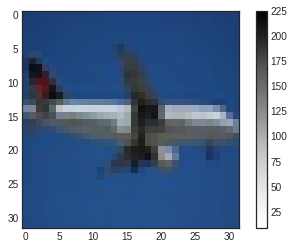

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

데이터 전처리

In [12]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

(40000, 3072)
(10000, 3072)
(10000, 3072)


모델 구성 및 컴파일

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_3 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_3 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense2 (Dense)               (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_4 (Activation)    (None, 1024)             

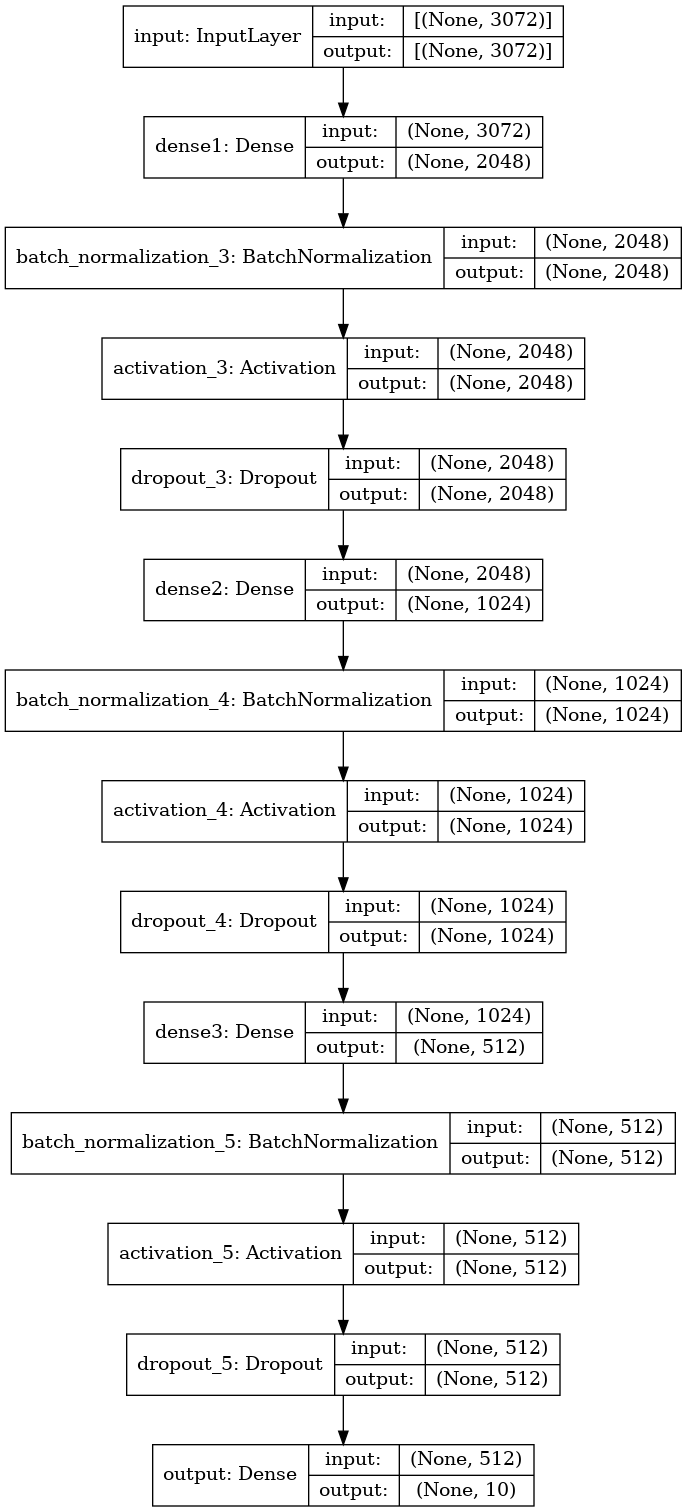

In [13]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()

model.add(layers.Input(shape=(3072, ), name='input'))
model.add(layers.Dense(2048, name='dense1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
          
model.add(layers.Dense(1024, name='dense2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(512, name='dense3'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

utils.plot_model(model, show_shapes=True)

모델 학습

In [14]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

check_point_cb = callbacks.ModelCheckpoint('best_model_CIFAR10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train,
            epochs=40,
            batch_size=512,
            validation_data=(x_val, y_val),
            callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
79/79 [==============================] - 3s 18ms/step - loss: 2.6601 - accuracy: 0.1588 - val_loss: 2.1438 - val_accuracy: 0.2030
Epoch 2/40
79/79 [==============================] - 1s 10ms/step - loss: 2.3932 - accuracy: 0.2132 - val_loss: 1.9953 - val_accuracy: 0.2934
Epoch 3/40
79/79 [==============================] - 1s 11ms/step - loss: 2.2507 - accuracy: 0.2491 - val_loss: 1.8777 - val_accuracy: 0.3363
Epoch 4/40
79/79 [==============================] - 1s 10ms/step - loss: 2.1632 - accuracy: 0.2657 - val_loss: 1.8029 - val_accuracy: 0.3580
Epoch 5/40
79/79 [==============================] - 1s 11ms/step - loss: 2.1025 - accuracy: 0.2828 - val_loss: 1.7497 - val_accuracy: 0.3777
Epoch 6/40
79/79 [==============================] - 1s 11ms/step - loss: 2.0473 - accuracy: 0.2958 - val_loss: 1.7169 - val_accuracy: 0.3895
Epoch 7/40
79/79 [==============================] - 1s 11ms/step - loss: 2.0001 - accuracy: 0.3069 - val_loss: 1.6925 - val_accuracy: 0.3988
Epoch 8/40
79

모델 학습 데이터 시각화

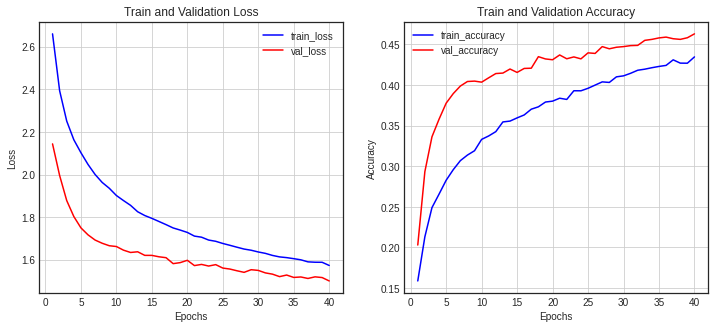

In [15]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델 평가 및 예측

In [16]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
# 평가
ac = model.evaluate(x_test, y_test)
print(ac) 

#예측
y_pred= model.predict(x_test)
print(y_pred)

313/313 [==============================] - 1s 3ms/step - loss: 1.4790 - accuracy: 0.4702
[1.4789620637893677, 0.4702000021934509]
[[0.02464686 0.06156011 0.09884857 ... 0.01124351 0.06711908 0.01389658]
 [0.05646121 0.16534512 0.00141781 ... 0.00092544 0.46041498 0.31261477]
 [0.13502838 0.09104331 0.00499064 ... 0.00142667 0.6722578  0.08977454]
 ...
 [0.0057666  0.00146186 0.1435008  ... 0.02974941 0.00720011 0.00191864]
 [0.02404053 0.02313724 0.11083568 ... 0.04724656 0.03348648 0.01861224]
 [0.02960345 0.0079769  0.11483085 ... 0.43611896 0.00881811 0.0115588 ]]
